In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X = sc.fit_transform(X)

In [5]:
from som_scratch import SOM

som = SOM((10,10),15)

In [6]:
som.random_weights_init() 

In [7]:
som.train(X,100)

Epoch 0/100 - Learning rate: 0.1, Radius: 1.0
Epoch 10/100 - Learning rate: 0.09000000000000001, Radius: 0.9
Epoch 20/100 - Learning rate: 0.08000000000000002, Radius: 0.8
Epoch 30/100 - Learning rate: 0.06999999999999999, Radius: 0.7
Epoch 40/100 - Learning rate: 0.06, Radius: 0.6
Epoch 50/100 - Learning rate: 0.05, Radius: 0.5
Epoch 60/100 - Learning rate: 0.04000000000000001, Radius: 0.4
Epoch 70/100 - Learning rate: 0.030000000000000006, Radius: 0.30000000000000004
Epoch 80/100 - Learning rate: 0.019999999999999997, Radius: 0.19999999999999996
Epoch 90/100 - Learning rate: 0.01, Radius: 0.1


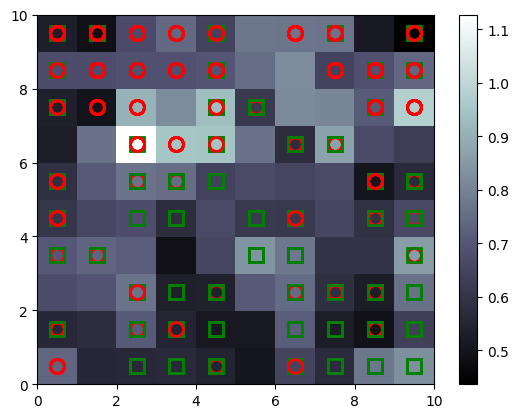

In [29]:
# Fraudlar outlierlar oluyor. Ve Beyaz kutucuklar yani MID skoru en yüksek olanlar fraudlar oluyor. (Mean Interneuron Distance)
# Siyah kutucuklar ise en düşük olanlar oluyor. Bunlar komşu kutucuklara benzerlikleri en yüksek olanlar oluyor.
som.visualize(X, labels=y, markers=["o", "s"], colors=["r", "g"])


In [20]:
# Finding Frauds
mappings = som.win_map(X)
mappings


{(9,
  8): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
         0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
         0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.81120334, 1.        , 0.17789474, 0.01196429, 0.5       ,
         0.23076923, 0.875     , 0.12280702, 0.        , 0.        ,
         0.        , 1.        , 0.5       , 0.17      , 0.        ]), array([0.50077484, 1.        , 0.21052632, 0.04607143, 0.5       ,
         0.23076923, 0.875     , 0.00877193, 0.        , 0.        ,
         0.        , 1.        , 0.        , 0.07      , 0.        ]), array([0.8735269 , 1.        , 0.29819549, 0.00892857, 0.5       ,
         0.15384615, 0.5       , 0.14035088, 0.        , 0.        ,
         0.        , 1.        , 0.        , 0.21      , 0.        ]), array([0.59371959, 1.        , 0.06766917, 0.00589286, 0.5       ,
         0.07692308, 0.375     , 0.00877193, 0.        , 0.        ,
         0.        , 1. 

In [21]:
# Beyaz karenin koordinatları (7,8). Bu karedekileri alıyoruz
frauds = mappings[(2,6)]
frauds

[array([1.71710134e-01, 0.00000000e+00, 2.50676692e-01, 4.91071429e-02,
        5.00000000e-01, 6.15384615e-01, 8.75000000e-01, 1.40350877e-03,
        0.00000000e+00, 1.00000000e+00, 4.47761194e-02, 0.00000000e+00,
        5.00000000e-01, 0.00000000e+00, 3.30000000e-04]),
 array([7.82624365e-01, 0.00000000e+00, 4.13533835e-02, 4.46428571e-02,
        5.00000000e-01, 7.69230769e-01, 3.75000000e-01, 8.77192982e-03,
        0.00000000e+00, 1.00000000e+00, 1.49253731e-02, 0.00000000e+00,
        5.00000000e-01, 5.40000000e-02, 9.80000000e-04]),
 array([0.40224403, 0.        , 0.09518797, 0.00446429, 0.5       ,
        0.76923077, 0.375     , 0.03508772, 0.        , 1.        ,
        0.01492537, 0.        , 0.5       , 0.12      , 0.00768   ]),
 array([1.60806314e-01, 0.00000000e+00, 8.76691729e-02, 2.37500000e-02,
        0.00000000e+00, 5.38461538e-01, 3.75000000e-01, 3.50877193e-02,
        0.00000000e+00, 1.00000000e+00, 1.49253731e-02, 0.00000000e+00,
        5.00000000e-01, 1.0000

In [22]:
# Inverse transform yapacağız scale i sıfırlamak için
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5608595e+07, 0.0000000e+00, 3.0420000e+01, 1.3750000e+00,
        2.0000000e+00, 9.0000000e+00, 8.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 1.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 3.4000000e+01],
       [1.5761158e+07, 0.0000000e+00, 1.6500000e+01, 1.2500000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 2.5000000e-01,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0800000e+02, 9.9000000e+01],
       [1.5666166e+07, 0.0000000e+00, 2.0080000e+01, 1.2500000e-01,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.4000000e+02, 7.6900000e+02],
       [1.5605872e+07, 0.0000000e+00, 1.9580000e+01, 6.6500000e-01,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [23]:
print(frauds)

[[1.5608595e+07 0.0000000e+00 3.0420000e+01 1.3750000e+00 2.0000000e+00
  9.0000000e+00 8.0000000e+00 4.0000000e-02 0.0000000e+00 1.0000000e+00
  3.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 3.4000000e+01]
 [1.5761158e+07 0.0000000e+00 1.6500000e+01 1.2500000e+00 2.0000000e+00
  1.1000000e+01 4.0000000e+00 2.5000000e-01 0.0000000e+00 1.0000000e+00
  1.0000000e+00 0.0000000e+00 2.0000000e+00 1.0800000e+02 9.9000000e+01]
 [1.5666166e+07 0.0000000e+00 2.0080000e+01 1.2500000e-01 2.0000000e+00
  1.1000000e+01 4.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
  1.0000000e+00 0.0000000e+00 2.0000000e+00 2.4000000e+02 7.6900000e+02]
 [1.5605872e+07 0.0000000e+00 1.9580000e+01 6.6500000e-01 1.0000000e+00
  8.0000000e+00 4.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
  1.0000000e+00 0.0000000e+00 2.0000000e+00 2.0000000e+03 3.0000000e+00]
 [1.5665087e+07 0.0000000e+00 1.8250000e+01 1.0000000e+01 2.0000000e+00
  9.0000000e+00 4.0000000e+00 1.0000000e+00 0.0000000e+00 1.

In [24]:
frauds_df = pd.DataFrame(frauds, columns=dataset.columns[:-1])
frauds_df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15608595.0,0.0,30.42,1.375,2.0,9.0,8.0,0.04,0.0,1.0,3.0,0.0,2.0,0.0,34.0
1,15761158.0,0.0,16.50,1.250,2.0,11.0,4.0,0.25,0.0,1.0,1.0,0.0,2.0,108.0,99.0
2,15666166.0,0.0,20.08,0.125,2.0,11.0,4.0,1.00,0.0,1.0,1.0,0.0,2.0,240.0,769.0
3,15605872.0,0.0,19.58,0.665,1.0,8.0,4.0,1.00,0.0,1.0,1.0,0.0,2.0,2000.0,3.0
4,15665087.0,0.0,18.25,10.000,2.0,9.0,4.0,1.00,0.0,1.0,1.0,0.0,2.0,120.0,2.0
